In [26]:
import muselsl
import vispy
import pandas as pd
import os

In [45]:
!muselsl record --duration 30

Looking for a EEG stream...
2023-04-12 15:25:25.812 (   0.733s) [          6AE6C2]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2023-04-12 15:25:25.812 (   0.733s) [          6AE6C2]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2023-04-12 15:25:25.812 (   0.733s) [          6AE6C2]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2023-04-12 15:25:25.812 (   0.734s) [          6AE6C2]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2023-04-12 15:25:25.812 (   0.734s) [          6AE6C2]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2023-04-12 15:25:25.812 (   0.734s) [          6AE6C2]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2023-04-12 15:25:25.812 (   0.734s) [          6AE6C2]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2023-04-12 15:25:25.812 (   0.734s) [          6AE6C2]   

Can't find Markers stream.
Start recording at time t=1681293330.820
Time correction:  -0.00020368769764900208
Time correction:  -0.00021997862495481968
Done - wrote file: /Users/diganta/Desktop/BCI/eeg-frequency-bands/EEG_recording_2023-04-12-09.55.25.csv


In [24]:
!ls

EEG_recording_2023-04-12-09.09.57.csv README.md
EEG_recording_2023-04-12-09.11.08.csv eeg-bands.ipynb
EEG_recording_2023-04-12-09.12.24.csv


In [37]:
data_5s = pd.read_csv('EEG_recording_2023-04-12-09.09.57.csv', index_col='timestamps', usecols=[0,1,2,3,4])
data_10s = pd.read_csv('EEG_recording_2023-04-12-09.12.24.csv', index_col='timestamps', usecols=[0,1,2,3,4])
data_30s = pd.read_csv('EEG_recording_2023-04-12-09.11.08.csv', index_col='timestamps', usecols=[0,1,2,3,4])

In [40]:
data_5s.info(), data_10s.info(), data_30s.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 1681290603.044 to 1681290603.087
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     12 non-null     float64
 1   AF7     12 non-null     float64
 2   AF8     12 non-null     float64
 3   TP10    12 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1296 entries, 1681290749.943 to 1681290755.002
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     1296 non-null   float64
 1   AF7     1296 non-null   float64
 2   AF8     1296 non-null   float64
 3   TP10    1296 non-null   float64
dtypes: float64(4)
memory usage: 50.6 KB
<class 'pandas.core.frame.DataFrame'>
Float64Index: 6432 entries, 1681290673.635 to 1681290698.754
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   

(None, None, None)

In [42]:
data_10s.head()

,TP9,AF7,AF8,TP10
timestamps,,,,
1.681291e+09,-35.156,-41.992,143.066,-33.691
1.681291e+09,-37.109,-41.992,138.672,-33.691
1.681291e+09,-28.809,-43.945,138.184,-24.902
1.681291e+09,-34.180,-43.457,127.930,-26.855
1.681291e+09,-36.133,-43.945,129.395,-32.715


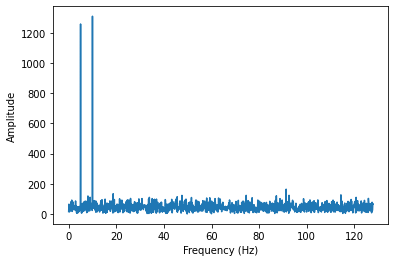

In [47]:
import numpy as np
from scipy.fft import fft

# Generate a random EEG signal
t = np.linspace(0, 10, 2560)
f1 = 5  # alpha frequency in Hz
f2 = 10  # beta frequency in Hz
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.random.randn(len(t))

# Compute the FFT
X = fft(x)

# Plot the amplitude spectrum
import matplotlib.pyplot as plt
freqs = np.fft.fftfreq(len(x), t[1]-t[0])
plt.plot(freqs[:len(freqs)//2], np.abs(X[:len(X)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()
